<a href="https://colab.research.google.com/github/ramonferrari/trab_cadu/blob/main/Kadu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **COVIDiSTRESS Global Survey dataset**
 Trabalho final da disciplina Tratamento, Análise e Aprendizado Estatístico de Dados

# Importação de dados e preparação


In [1]:
install.packages("ggplot2")           # pacote para gráficos
install.packages("corrplot")          # pacote para correlacao de variaveis
install.packages("caret")             # Classification And REgression Training
install.packages("dplyr")
install.packages("tidyverse")
install.packages("scales")
install.packages("gridExtra")         # pacote para gráficos
install.packages("ggthemes")

suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(corrplot)))
suppressMessages(suppressWarnings(library(caret)))
suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(scales)))
suppressMessages(suppressWarnings(library(tibble)))
library(gridExtra)
library(ggthemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
df1 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-1.csv",header=TRUE,sep=",");
df2 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-2.csv",header=TRUE,sep=",");
df3 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-3.csv",header=TRUE,sep=",");
df4 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-4.csv",header=TRUE,sep=",");
df5 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-5.csv",header=TRUE,sep=",");
df6 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-6.csv",header=TRUE,sep=",");

df_backup <- rbind(df1,df2,df3,df4,df5,df6) # concatena os dados
dim(df_backup)
dim(na.omit(df_backup))
colnames(df_backup)

[1] 125306    154

[1]   0 154

[1] "ID"                    "answered_all"          "Duration..in.seconds."
  [4] "RecordedDate"          "UserLanguage"          "Dem_age"              
  [7] "Dem_gender"            "Dem_edu"               "Dem_edu_mom"          
 [10] "Dem_employment"        "Country"               "Dem_Expat"            
 [13] "Dem_state"             "Dem_maritalstatus"     "Dem_dependents"       
 [16] "Dem_riskgroup"         "Dem_isolation"         "Dem_isolation_adults" 
 [19] "Dem_isolation_kids"    "AD_gain"               "AD_loss"              
 [22] "AD_check"              "Scale_PSS10_UCLA_1"    "Scale_PSS10_UCLA_2"   
 [25] "Scale_PSS10_UCLA_3"    "Scale_PSS10_UCLA_4"    "Scale_PSS10_UCLA_5"   
 [28] "Scale_PSS10_UCLA_6"    "Scale_PSS10_UCLA_7"    "Scale_PSS10_UCLA_8"   
 [31] "Scale_PSS10_UCLA_9"    "Scale_PSS10_UCLA_10"   "Scale_SLON_1"         
 [34] "Scale_SLON_2"          "Scale_SLON_3"          "OECD_people_1"        
 [37] "OECD_people_2"         "OECD_insititutions_1"  "OECD_insititutions_2" 
 [40] "OECD_insititutions_3"  "OECD_insititutions_4"  "OECD_insititutions_5" 
 [43] "OECD_insititutions_6"  "Corona_concerns_1"     "Corona_concerns_2"    
 [46] "Corona_concerns_3"     "Corona_concerns_4"     "Corona_concerns_5"    
 [49] "Trust_countrymeasure"  "Compliance_1"          "Compliance_2"         
 [52] "Compliance_3"          "Compliance_4"          "Compliance_5"         
 [55] "Compliance_6"          "born_92"               "experience_war"       
 [58] "experience_war_TXT"    "war_injury"            "loss_during_war"      
 [61] "time_spent_in_war"     "time_spent_in_war_TXT" "Scale_UCLA_TRI_1"     
 [64] "Scale_UCLA_TRI_2"      "Scale_UCLA_TRI_3"      "Scale_UCLA_TRI_4"     
 [67] "PS_PTSD_1"             "PS_PTSD_2"             "PS_PTSD_3"            
 [70] "PS_PTSD_4"             "PS_PTSD_5"             "BFF_15_1"             
 [73] "BFF_15_2"              "BFF_15_3"              "BFF_15_4"             
 [76] "BFF_15_5"              "BFF_15_6"              "BFF_15_7"             
 [79] "BFF_15_8"              "BFF_15_9"              "BFF_15_10"            
 [82] "BFF_15_11"             "BFF_15_12"             "BFF_15_13"            
 [85] "BFF_15_14"             "BFF_15_15"             "Expl_Distress_1"      
 [88] "Expl_Distress_2"       "Expl_Distress_3"       "Expl_Distress_4"      
 [91] "Expl_Distress_5"       "Expl_Distress_6"       "Expl_Distress_7"      
 [94] "Expl_Distress_8"       "Expl_Distress_9"       "Expl_Distress_10"     
 [97] "Expl_Distress_11"      "Expl_Distress_12"      "Expl_Distress_13"     
[100] "Expl_Distress_14"      "Expl_Distress_15"      "Expl_Distress_16"     
[103] "Expl_Distress_17"      "Expl_Distress_18"      "Expl_Distress_19"     
[106] "Expl_Distress_20"      "Expl_Distress_21"      "Expl_Distress_22"     
[109] "Expl_Distress_23"      "Expl_Distress_24"      "Expl_Distress_txt"    
[112] "SPS_1"                 "SPS_2"                 "SPS_3"                
[115] "SPS_4"                 "SPS_5"                 "SPS_6"                
[118] "SPS_7"                 "SPS_8"                 "SPS_9"                
[121] "SPS_10"                "Expl_Coping_1"         "Expl_Coping_2"        
[124] "Expl_Coping_3"         "Expl_Coping_4"         "Expl_Coping_5"        
[127] "Expl_Coping_6"         "Expl_Coping_7"         "Expl_Coping_8"        
[130] "Expl_Coping_9"         "Expl_Coping_10"        "Expl_Coping_11"       
[133] "Expl_Coping_12"        "Expl_Coping_13"        "Expl_Coping_14"       
[136] "Expl_Coping_15"        "Expl_Coping_16"        "Expl_coping_txt"      
[139] "Expl_media_1"          "Expl_media_2"          "Expl_media_3"         
[142] "Expl_media_4"          "Expl_media_5"          "Expl_media_6"         
[145] "Final_open"            "PSS10_avg"             "SLON3_avg"            
[148] "neu"                   "ext"                   "ope"                  
[151] "agr"                   "con"                   "SPS_avg"              
[154] "Scale_UCLA_TRI_av

In [5]:
df<-df_backup[,1:19]

df$Dem_gender <- as.factor(df$Dem_gender)
levels(df$Dem_gender)

# Criação dos indices compostos
df$SPS = rowMeans(df_backup[,112:121],na.rm=TRUE)#####
df$Expl_media = rowMeans(df_backup[,139:144],na.rm=TRUE)
df$Expl_coping = rowMeans(df_backup[,122:137],na.rm=TRUE)#####
df$Expl_Distress = rowMeans(df_backup[,87:110],na.rm=TRUE)#####
df$BFF = rowMeans(df_backup[,72:86],na.rm=TRUE)#####
df$Compliance = rowMeans(df_backup[,50:55],na.rm=TRUE)#####
df$Corona_concerns = rowMeans(df_backup[,44:48],na.rm=TRUE)#####
df$PSS = rowMeans(df_backup[,23:32],na.rm=TRUE)#####
df$OECD_people = rowMeans(df_backup[,36:37],na.rm=TRUE)#####
df$OECD_inst = rowMeans(df_backup[,38:43],na.rm=TRUE)#####
df$Lon = rowMeans(df_backup[,33:35],na.rm=TRUE)#####
dim(df)
colnames(df)

[1] "Female"                     "Male"                      
[3] "Other/would rather not say"

[1] 125306     30

[1] "ID"                    "answered_all"          "Duration..in.seconds."
 [4] "RecordedDate"          "UserLanguage"          "Dem_age"              
 [7] "Dem_gender"            "Dem_edu"               "Dem_edu_mom"          
[10] "Dem_employment"        "Country"               "Dem_Expat"            
[13] "Dem_state"             "Dem_maritalstatus"     "Dem_dependents"       
[16] "Dem_riskgroup"         "Dem_isolation"         "Dem_isolation_adults" 
[19] "Dem_isolation_kids"    "SPS"                   "Expl_media"           
[22] "Expl_coping"           "Expl_Distress"         "BFF"                  
[25] "Compliance"            "Corona_concerns"       "PSS"                  
[28] "OECD_people"           "OECD_inst"             "Lon"

# Mapa de variáveis

In [3]:
write.csv(df,"data_frame_for_map.csv", row.names = TRUE)

# Modelagem Numérica

In [ ]:
df_num <- df       ##### só numéricos
df_num[,1:2] <- NULL
df_num[,2:3] <- NULL
df_num[,3:10] <- NULL
df_num[,4:5] <- NULL

colnames(df_num)
head(df_num)

[1] "Duration..in.seconds." "Dem_age"               "Dem_dependents"       
 [4] "Dem_isolation_adults"  "Dem_isolation_kids"    "SPS"                  
 [7] "Expl_media"            "Expl_coping"           "Expl_Distress"        
[10] "BFF"                   "Compliance"            "Corona_concerns"      
[13] "PSS"                   "OECD_people"           "OECD_inst"            
[16] "Lon"

,Duration..in.seconds.,Dem_age,Dem_dependents,Dem_isolation_adults,Dem_isolation_kids,SPS,Expl_media,Expl_coping,Expl_Distress,BFF,Compliance,Corona_concerns,PSS,OECD_people,OECD_inst,Lon
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,180,29,0,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN,NaN,3.000000
2,3100,20,0,NA,NA,5.0,2.500000,3.937500,27.583333,4.066667,3.333333,3.20,2.8,6.5,4.000000,2.333333
3,127,47,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1710,79,0,1,0,3.9,3.833333,2.666667,30.523810,4.142857,3.500000,3.00,3.4,6.0,2.600000,4.000000
5,2239,61,0,1,0,5.0,4.333333,5.066667,8.913043,4.266667,5.200000,4.25,3.0,8.0,7.666667,1.000000
6,1221,68,0,1,0,5.0,5.000000,4.187500,11.750000,3.933333,4.000000,5.00,2.9,7.0,7.500000,2.333333


In [ ]:
a<-nrow(df_num)
df_num <- na.omit(df_num)
b<-nrow(df_num)

a;b;round(100*b/a,2)

[1] 125306

[1] 74271

[1] 59.27

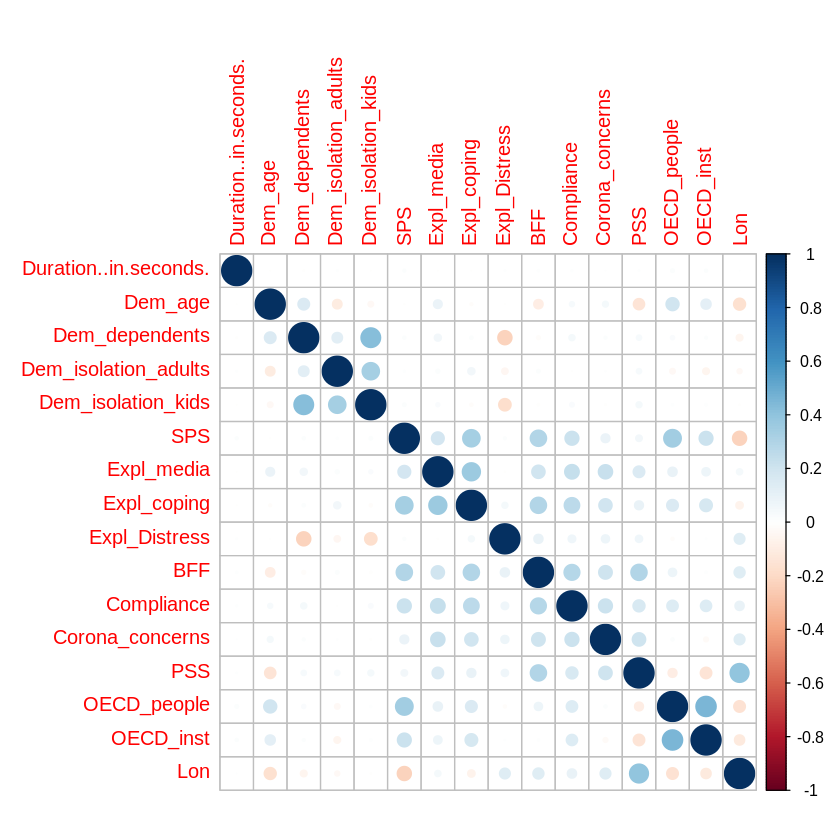

In [ ]:
corrplot(cor(df_num))

In [ ]:
set.seed(314)
trainIndex <- createDataPartition(df_num$PSS, p = .7, list = FALSE)

dfTrain <- df_num[ trainIndex,]
dfTest  <- df_num[-trainIndex,]

model1 <- train(PSS~.,data = dfTrain,method = "lm")
model1

# Análise dos Dados


In [6]:
# Criação de colunas de estatísticas descritivas por PAÍS

df1_names <- aggregate(x=df$Dem_age,by=list(df$Country),FUN=sum)[,1]
df1_sum <- aggregate(x=df$Dem_gender,by=list(df$Country),FUN=length)[,2]
df1_mean  <- aggregate(x=df$Dem_age,by=list(df$Country),FUN=mean)[,2]
df1_sd  <- aggregate(x=df$Dem_age,by=list(df$Country),FUN=sd)[,2]

df1_sex <- aggregate(x=df$Dem_gender,by=list(df$Country,df$Dem_gender),FUN=length,drop=FALSE) # Cálculo do N
df1_fem <- filter(df1_sex,df1_sex[,2]=="Female")[3]
df1_mas <- filter(df1_sex,df1_sex[,2]=="Male")[3]
df1_out <- filter(df1_sex,df1_sex[,2]=="Other/would rather not say")[3]

df1_fem<-round(df1_fem/df1_sum,3) # Arredonda, com 3 casas decimais
df1_mas<-round(df1_mas/df1_sum,3)
df1_out<-1-df1_mas-df1_fem

df1 <- data.frame(df1_names,df1_sum,df1_fem,df1_mas,df1_out,df1_mean,df1_sd)
variaveis <- c("Country","N","Sex Feminine","Sex Masculine","Other","Mean","Sd")
names(df1) <- variaveis

df1 <- df1[order(df1$N),]
df1 <- df1[order(-df1$N),]

head(df1) # Visão das estatísticas descritivas para os países com maior e menor N
tail(df1)
dim(df1)

paises <- df1[,1:2]
paises$Mean_age <- df1$Mean

,Country,N,Sex Feminine,Sex Masculine,Other,Mean,Sd
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
55,Finland,22933,0.813,0.167,0.020,43.35721,14.16987
56,France,13475,0.510,0.472,0.018,33.26738,12.76009
43,Denmark,10891,0.783,0.211,0.006,42.54302,14.27699
105,Mexico,9169,0.720,0.270,0.010,37.45338,13.83011
95,Lithuania,8255,0.751,0.242,0.007,38.55300,12.45947
7,Argentina,5923,0.837,0.151,0.012,41.59277,15.24368


,Country,N,Sex Feminine,Sex Masculine,Other,Mean,Sd
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
148,Somalia,1,NA,1,NA,26,NA
152,Sudan,1,1,NA,NA,33,NA
153,"Sudan, South",1,NA,1,NA,49,NA
158,Tajikistan,1,1,NA,NA,33,NA
162,The Gambia,1,1,NA,NA,58,NA
166,Turkmenistan,1,NA,1,NA,58,NA


[1] 177   7

In [7]:
# Restringe o dataset aos dados de países com mais de 200 respostas.

df_pais<-merge(df, paises)
dim(df)
df<-filter(df_pais,df_pais$N>200)
dim(df)

[1] 125306     30

[1] 122065     32

In [ ]:
# Exportação de dados para criação de mapas

write.csv(df_pais,"data_frame_for_map_withN.csv", row.names = TRUE)

## Idade

In [30]:
# Calcula média de idade por país
checa_idades_por_paises <- aggregate(x=df$Dem_age,by=list(df$Country),FUN=mean)
checa_idades_por_paises <- checa_idades_por_paises[order(checa_idades_por_paises$x),]
head(checa_idades_por_paises,3)
tail(checa_idades_por_paises,3)
dim(checa_idades_por_paises)

# Cria um dataset apenas com alguns países
df_age<-df[df$Country == "Brazil" | df$Country == "Pakistan" | df$Country == "Bangladesh" | df$Country == "United States" | df$Country == "Sweden" | df$Country == "Hungary",]

dim(df)
dim(df_age)
df_age <- df_age[order(df_age$Mean_age),]
#head(df_age)
#tail(df_age)

,Group.1,x
,<chr>,<dbl>
31,Philippines,25.85263
29,Pakistan,27.05278
4,Bangladesh,28.08789


,Group.1,x
,<chr>,<dbl>
27,Netherlands,44.94417
38,Sweden,46.47660
17,Hungary,49.02156


[1] 43  2

[1] 122065     32

[1] 8319   32

In [9]:
dim(df)

checa_respostas_por_paises <- df[df$N > 3054,] # Seleciona 4 países com maior quantidade de respostas, para visualização dos dados
dim(checa_respostas_por_paises)

# Adiciona United States e Brazil na lista
checa_respostas_por_paises <- rbind(checa_respostas_por_paises,df[df$Country == "United States",],df[df$Country == "Brazil",])
checa_respostas_por_paises$Country[checa_respostas_por_paises$Country=="United States"]<-"US"
dim(checa_respostas_por_paises)

[1] 122065     32

[1] 86646    32

[1] 89691    32

png 
  2

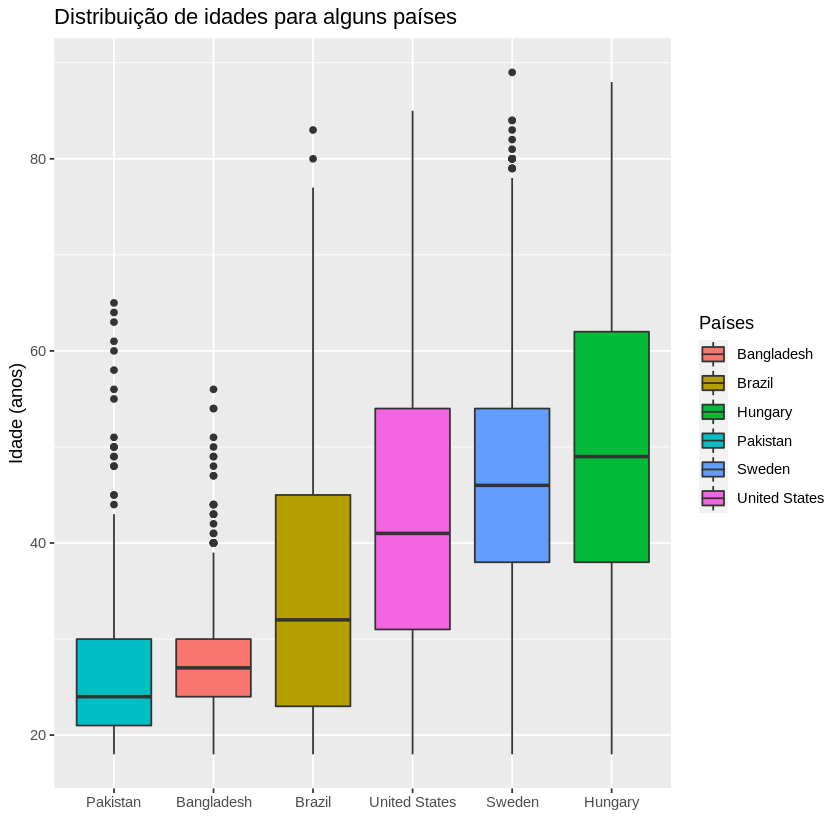

In [10]:
# Gráfico de boxplot da variável idade para alguns países
g1 <- ggplot(df_age, aes(x=reorder(Country,Mean_age), y=Dem_age, fill=Country)) +  geom_boxplot() +
    ggtitle("Distribuição de idades para alguns países") +  xlab("") + ylab("Idade (anos)") + labs(fill = "Países")

g1
pdf("Figura1_boxplot.pdf",title="Avaliação do critério de parada")
g1
dev.off()

png 
  2

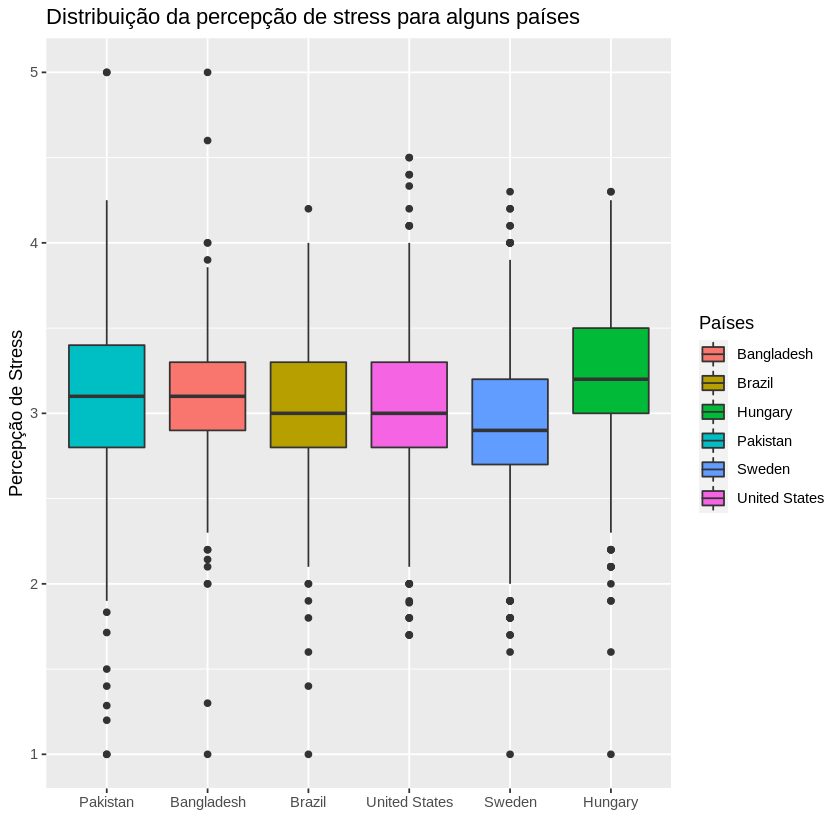

In [13]:
# Gráfico de boxplot da variável PSS para alguns países

g1 <- ggplot(df_age, aes(x=reorder(Country,Mean_age), y=PSS, fill=Country,na.rm=TRUE)) +  geom_boxplot() +
    ggtitle("Distribuição da percepção de stress para alguns países") +  xlab("") + ylab("Percepção de Stress") + labs(fill = "Países") 

suppressWarnings(print(g1))
pdf("Figura2_boxplot.pdf",title="Avaliação do critério de parada")
suppressWarnings(print(g1))
dev.off()

png 
  2

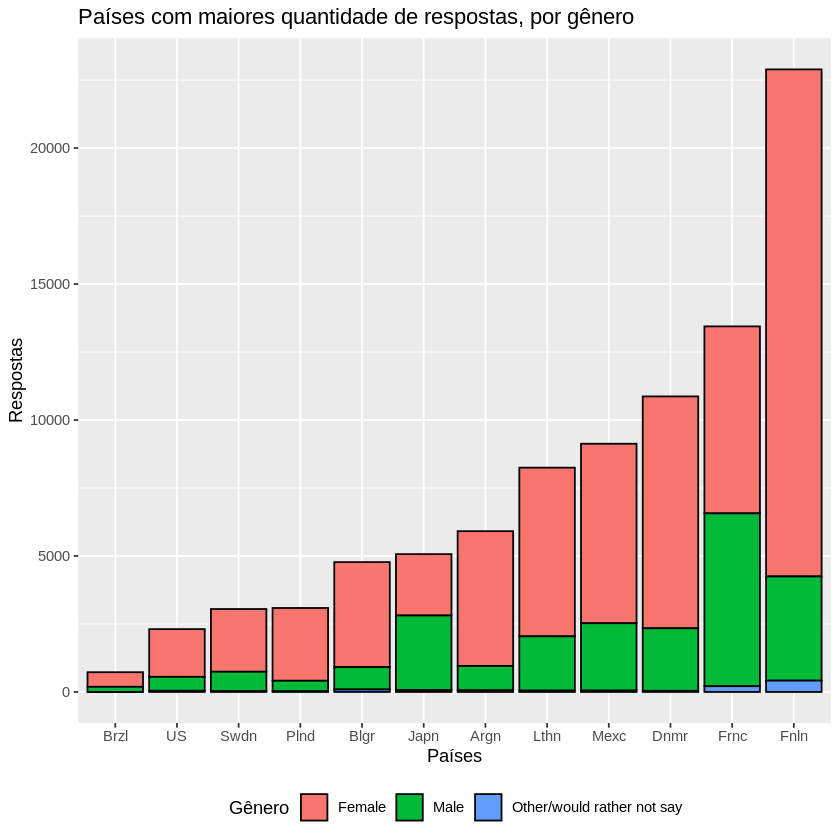

In [14]:
# Gráfico de barras de N por países, com segregação por gênero

g2 <- ggplot(data=checa_respostas_por_paises[!is.na(checa_respostas_por_paises$Dem_gender), ], aes(x=reorder(Country,N),fill=Dem_gender)) +
    geom_bar(stat="count",color="black") +
    ggtitle("Países com maiores quantidade de respostas, por gênero") +  xlab("Países") + ylab("Respostas") + labs(fill = "Gênero",legend.position="top")+
    scale_x_discrete(labels = abbreviate)

g2 + theme(legend.position="bottom")
pdf("N_Sex_Barplot.pdf",title="Países com maiores quantidade de respostas, por gênero")
g2 + theme(legend.position="bottom")
dev.off()

In [15]:
# Adequa levels do nivel escolar

levels(as.factor(checa_respostas_por_paises$Dem_edu))
print("------")
checa_respostas_por_paises$Education <- factor(checa_respostas_por_paises$Dem_edu)
levels(checa_respostas_por_paises$Education) <- list("Nenhum a Fundamental"=c("None", "Uninformative response","Up to 6 years of school","Up to 9 years of school"), "Médio a graduação incompleta"=c("Some College, short continuing education or equivalent", "Up to 12 years of school"), "Graduação a Doutorado"=c("College degree, bachelor, master", "PhD/Doctorate"))
levels(checa_respostas_por_paises$Education)

[1] "College degree, bachelor, master"                      
[2] "None"                                                  
[3] "PhD/Doctorate"                                         
[4] "Some College, short continuing education or equivalent"
[5] "Uninformative response"                                
[6] "Up to 12 years of school"                              
[7] "Up to 6 years of school"                               
[8] "Up to 9 years of school"

[1] "------"


[1] "Nenhum a Fundamental"         "Médio a graduação incompleta"
[3] "Graduação a Doutorado"

In [16]:
# Adequa levels da ocupação

levels(as.factor(checa_respostas_por_paises$Dem_employment))
print("------")
checa_respostas_por_paises$Emplo <- factor(checa_respostas_por_paises$Dem_employment)
levels(checa_respostas_por_paises$Emplo) <- list("Estudantes/Aposentados"=c("Student", "Retired"), "Sem emprego"=c("Not employed"), "Algum emprego/Empregados"=c("Full time employed", "Part time employed","Self-employed"))
levels(checa_respostas_por_paises$Emplo)

[1] "Full time employed" "Not employed"       "Part time employed"
[4] "Retired"            "Self-employed"      "Student"

[1] "------"


[1] "Estudantes/Aposentados"   "Sem emprego"             
[3] "Algum emprego/Empregados"

png 
  2

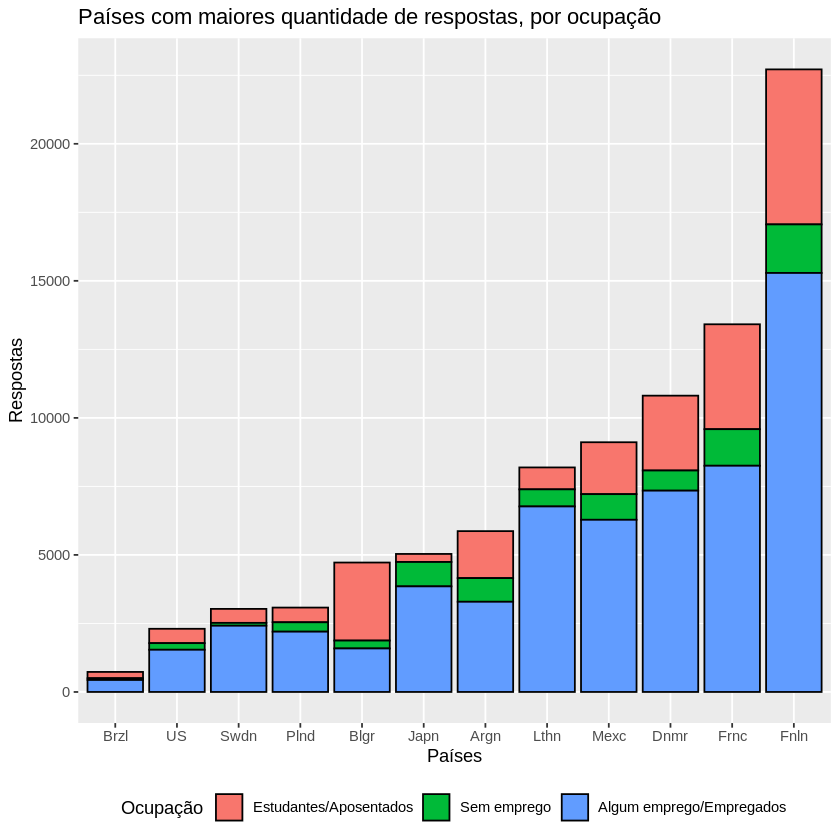

In [17]:
# Gráfico de barras de N por países, com segregação por ocupação

g6 <- ggplot(data=checa_respostas_por_paises[!is.na(checa_respostas_por_paises$Emplo), ], aes(x=reorder(Country,N),fill=Emplo)) +
    geom_bar(stat="count",color="black") +
    ggtitle("Países com maiores quantidade de respostas, por ocupação") +  xlab("Países") + ylab("Respostas") + labs(fill = "Ocupação",legend.position="top")+
    scale_x_discrete(labels = abbreviate)

g6 + theme(legend.position="bottom")
pdf("N_Ocupacao_Barplot.pdf",title="Países com maiores quantidade de respostas, por ocupação")
g6 + theme(legend.position="bottom")
dev.off()

png 
  2

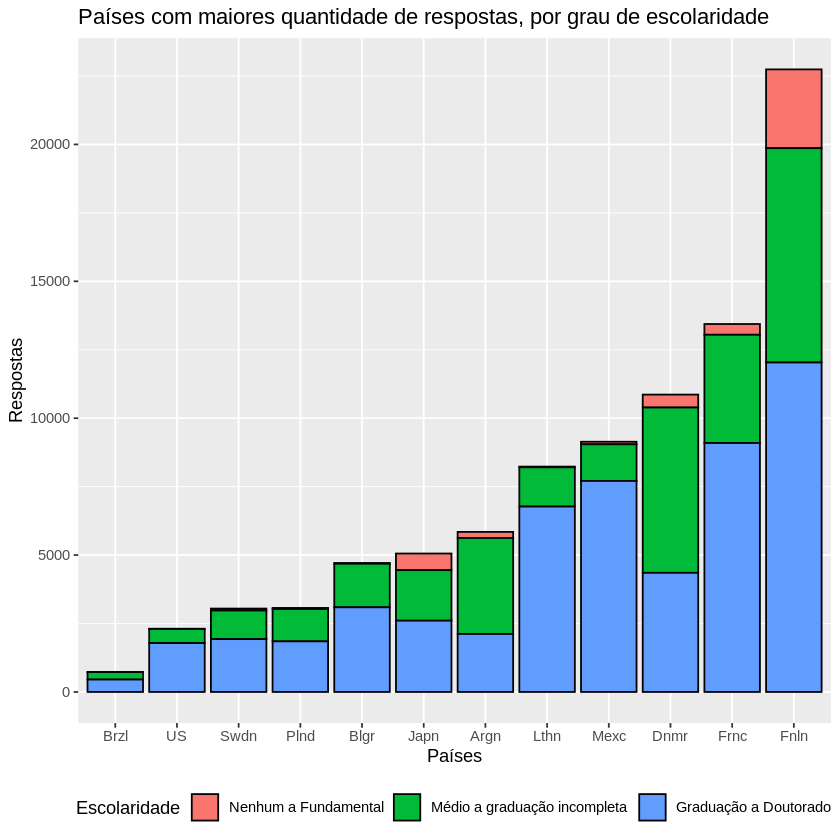

In [18]:
# Gráfico de barras de N por países, com segregação por escolaridade

g3 <- ggplot(data=checa_respostas_por_paises[!is.na(checa_respostas_por_paises$Education), ], aes(x=reorder(Country,N),fill=Education)) +
    geom_bar(stat="count",color="black") +
    ggtitle("Países com maiores quantidade de respostas, por grau de escolaridade") +  xlab("Países") + ylab("Respostas") + labs(fill = "Escolaridade",legend.position="top")+
    scale_x_discrete(labels = abbreviate)

g3 + theme(legend.position="bottom")
pdf("N_Education_Barplot.pdf",title="Países com maiores quantidade de respostas, por grau de escolaridade")
g3 + theme(legend.position="bottom")
dev.off()

null device 
          1

null device 
          1

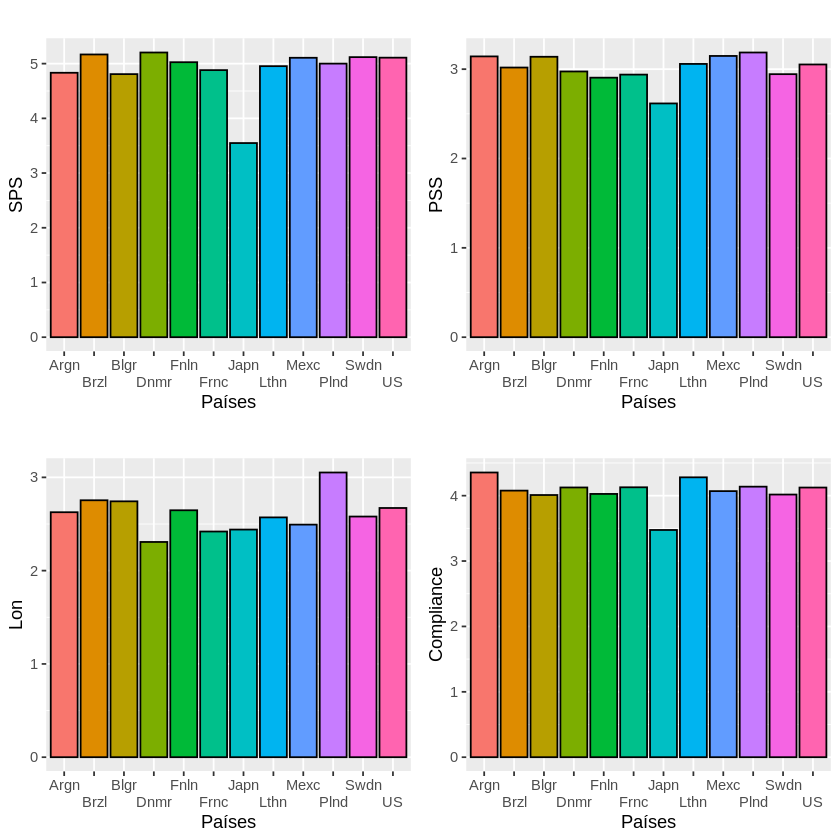

In [21]:
# Gráfico de barras de métricas perceptivas para alguns países

g41 <- ggplot(data=checa_respostas_por_paises, aes(x=Country,y=SPS,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("SPS") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g42 <- ggplot(data=checa_respostas_por_paises, aes(x=Country,y=PSS,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("PSS") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g43 <- ggplot(data=checa_respostas_por_paises, aes(x=Country,y=Lon,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("Lon") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g44 <- ggplot(data=checa_respostas_por_paises, aes(x=Country,y=Compliance,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("Compliance") + theme(legend.position="none") +
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

suppressWarnings(grid.arrange(g41,g42,g43,g44,ncol=2))
dev.off()
pdf("Metricas_paises_1.pdf",title="Métricas dos países com maiores quantidade de respostas")
suppressWarnings(grid.arrange(g41,g42,g43,g44,ncol=2))
dev.off()

null device 
          1

null device 
          1

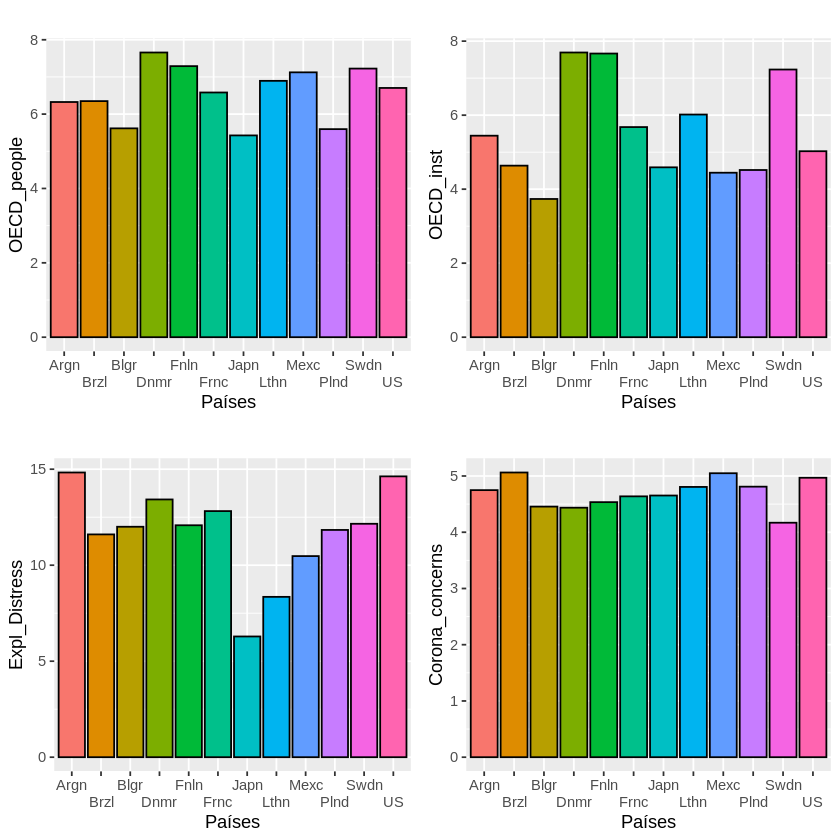

In [22]:
# Gráfico de barras de métricas perceptivas para alguns países

g51 <- ggplot(data=checa_respostas_por_paises, aes(x=Country,y=OECD_people,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("OECD_people") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g52 <- ggplot(data=checa_respostas_por_paises, aes(x=Country,y=OECD_inst,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("OECD_inst") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g53 <- ggplot(data=checa_respostas_por_paises, aes(x=Country,y=Expl_Distress,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("Expl_Distress") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g54 <- ggplot(data=checa_respostas_por_paises, aes(x=Country,y=Corona_concerns,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("Corona_concerns") + theme(legend.position="none") +
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

suppressWarnings(grid.arrange(g51,g52,g53,g54,ncol=2))
dev.off()
pdf("Metricas_paises_2.pdf",title="Métricas dos países com maiores quantidade de respostas")
suppressWarnings(grid.arrange(g51,g52,g53,g54,ncol=2))
dev.off()

In [23]:
checa2 <- checa_respostas_por_paises[!is.na(checa_respostas_por_paises$Dem_gender), ]
checa2 <- checa2[!checa2$Dem_gender=="Other/would rather not say",]

png 
  2

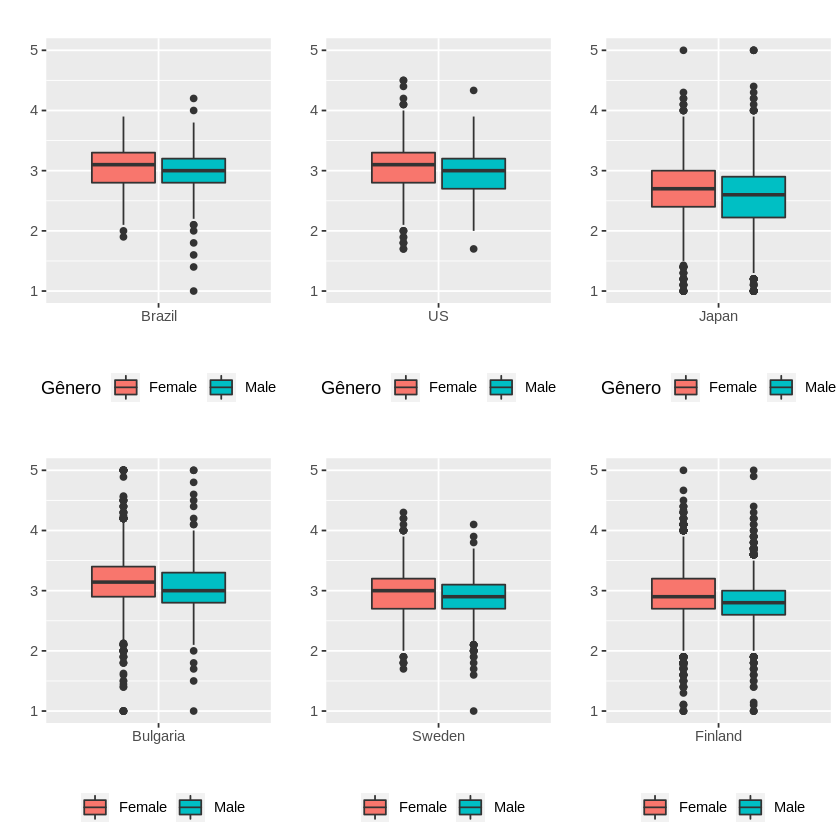

In [24]:
# Boxplot da variável PSS para alguns países, por gênero

new1 <- ggplot(checa2[checa2$Country=="Brazil",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = "Gênero")+ theme(legend.position="bottom")+ ylim(c(1, 5))

new2 <- ggplot(checa2[checa2$Country=="US",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = "Gênero")+ theme(legend.position="bottom")+ ylim(c(1, 5))

new3 <- ggplot(checa2[checa2$Country=="Japan",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = "Gênero")+ theme(legend.position="bottom")+ ylim(c(1, 5))

new4 <- ggplot(checa2[checa2$Country=="Bulgaria",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))

new5 <- ggplot(checa2[checa2$Country=="Sweden",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))

new6 <- ggplot(checa2[checa2$Country=="Finland",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))

suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
pdf("Boxplot_new1.pdf",title="xxxxx")
suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
dev.off()

In [25]:
# Cria ranges com faixas etárias
checa2$Range <- cut( as.numeric(checa2$Dem_age), breaks = c(15,25,35,45,55,65,110), labels = c("15-25","25-35","35-45","45-55","55-65","65+"))  # create Range column


png 
  2

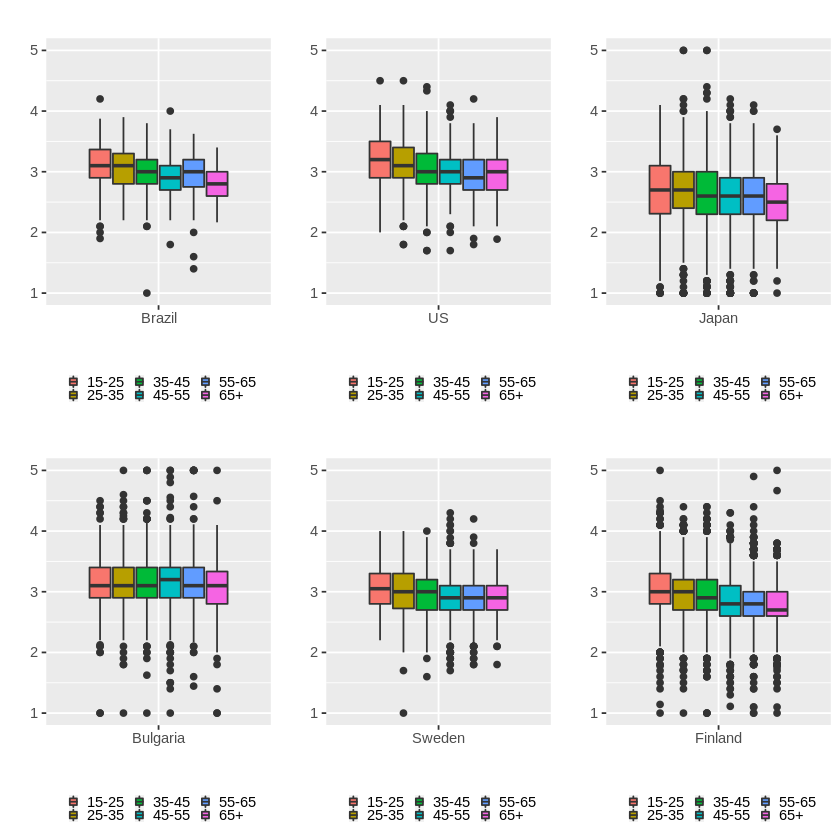

In [26]:
# Boxplot da variável PSS para alguns países, por faixa etária

new1 <- ggplot(checa2[checa2$Country=="Brazil",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

new2 <- ggplot(checa2[checa2$Country=="US",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

new3 <- ggplot(checa2[checa2$Country=="Japan",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

new4 <- ggplot(checa2[checa2$Country=="Bulgaria",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

new5 <- ggplot(checa2[checa2$Country=="Sweden",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

new6 <- ggplot(checa2[checa2$Country=="Finland",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
pdf("Boxplot_new2.pdf",title="xxxxx")
suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
dev.off()

In [27]:
# Criação de novos levels para educação - para abreviar

levels(checa2$Education)
levels(checa2$Education)[levels(checa2$Education)=="Nenhum a Fundamental"] <- "< Médio"
levels(checa2$Education)[levels(checa2$Education)=="Médio a graduação incompleta"] <- "Médio"
levels(checa2$Education)[levels(checa2$Education)=="Graduação a Doutorado"] <- "Grad+"
levels(checa2$Education)

checa2 <- checa2[!is.na(checa2$Education), ]

[1] "Nenhum a Fundamental"         "Médio a graduação incompleta"
[3] "Graduação a Doutorado"

[1] "< Médio" "Médio"   "Grad+"

png 
  2

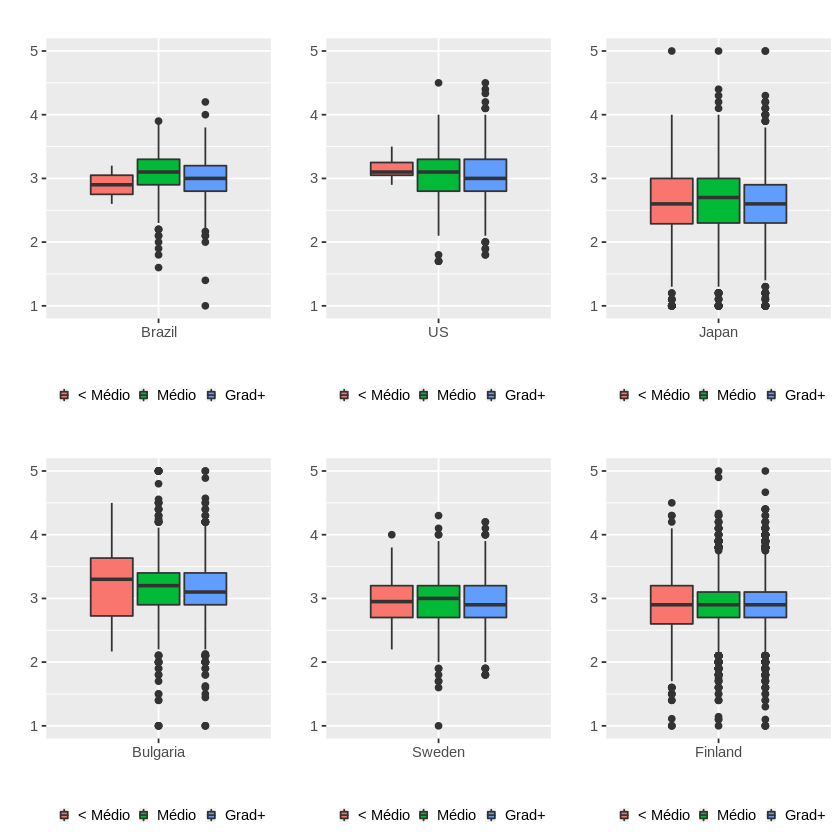

In [28]:
# Boxplot da variável PSS para alguns países, por escolaridade

new1 <- ggplot(checa2[checa2$Country=="Brazil",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

new2 <- ggplot(checa2[checa2$Country=="US",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

new3 <- ggplot(checa2[checa2$Country=="Japan",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

new4 <- ggplot(checa2[checa2$Country=="Bulgaria",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

new5 <- ggplot(checa2[checa2$Country=="Sweden",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

new6 <- ggplot(checa2[checa2$Country=="Finland",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
pdf("Boxplot_new3.pdf",title="xxxxx")
suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
dev.off()